In [1]:
%pylab inline
import elp_networks.algorithms as elpalg
import elp_nkmodel as elpnk
import net
import simulator
import strategy

Populating the interactive namespace from numpy and matplotlib


In [3]:
conform_perf = []
best_perf = []
diameter = []
degree = []
m = elpnk.NK(100, 2)
for rewire in range(10):
    rewire = rewire / float(10)
    print rewire
    edges = net.nk_to_network(m, 1, rewire)
    best_ind_strat = strategy.BestNeighborIndividual(m, edges)
    conform_ind_strat = strategy.ConformityIndividual(m, edges)
    print "  Simulating best-neighbor"
    sim = simulator.Simulator(m, edges, best_ind_strat)
    sim.run(50)
    best_perf.append(sim.values[-1])
    print "  Simulating conformity"
    sim = simulator.Simulator(m, edges, conform_ind_strat)
    sim.run(50)
    conform_perf.append(sim.values[-1])
    print "  Finding diameter"
    next_diameter = 0
    for n in edges.keys():
        distances = elpalg.get_distances_bfs(edges, n)
        d = max(distances.values())
        if d > next_diameter:
            next_diameter = d
    diameter.append(next_diameter)
    degree.append(sum([len(edges[n]) for n in edges.keys()]) / float(len(edges)))

0.0
  Simulating best-neighbor
  Simulating conformity
  Finding diameter
0.1
  Simulating best-neighbor
  Simulating conformity
  Finding diameter
0.2
  Simulating best-neighbor
  Simulating conformity
  Finding diameter
0.3
  Simulating best-neighbor
  Simulating conformity
  Finding diameter
0.4
  Simulating best-neighbor
  Simulating conformity
  Finding diameter
0.5
  Simulating best-neighbor
  Simulating conformity
  Finding diameter
0.6
  Simulating best-neighbor
  Simulating conformity
  Finding diameter
0.7
  Simulating best-neighbor
  Simulating conformity
  Finding diameter
0.8
  Simulating best-neighbor
  Simulating conformity
  Finding diameter
0.9
  Simulating best-neighbor
  Simulating conformity
  Finding diameter


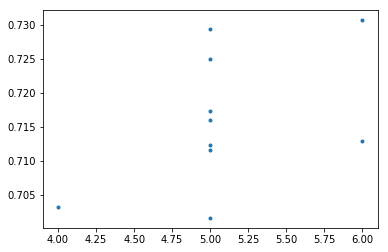

In [8]:
plt.plot(diameter, conform_perf, '.')